
Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top <br>
1 Trouser<br>
2 Pullover<br>
3 Dress<br>
4 Coat<br>
5 Sandal<br>
6 Shirt<br>
7 Sneaker<br>
8 Bag<br>
9 Ankle boot<br>
> Indented block



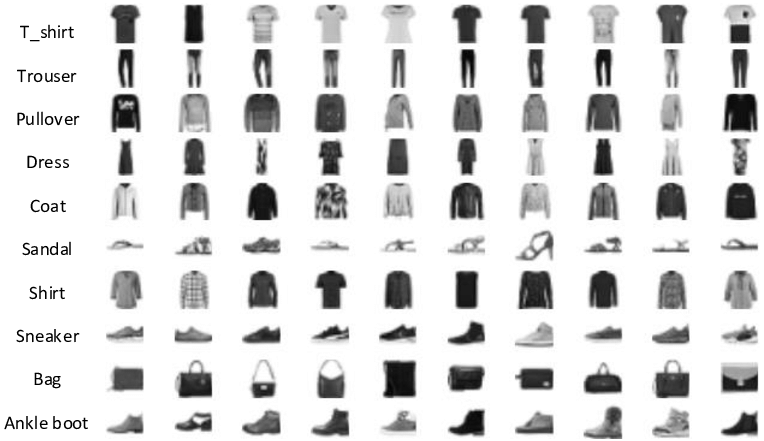

In [ ]:

image = load_img('/content/drive/MyDrive/fashion mnist/fashionmnistimage.png')
image

In [42]:
y_label_classes = ['T-shirt_top','Trouser',' Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag',' Ankle boot']
y_label_classes

['T-shirt_top',
 'Trouser',
 ' Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 ' Ankle boot']

In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 25.3 MB/s 
     |████████████████████████████████| 1.6 MB 54.5 MB/s 


In [ ]:
import tensorflow as tf

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array ,array_to_img , load_img
 

In [ ]:
# for the hyperparameter tuning
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import softmax, relu 
from tensorflow.keras.models import  load_model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [6]:
import tensorflow as tf

In [39]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [40]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
y_train.ndim

1

In [ ]:
pd.DataFrame(y_train).value_counts()
# only chek for how many categories are there

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
len(x_train[1][1])

# first row of first item

28

In [ ]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

(-0.5, 27.5, 27.5, -0.5)

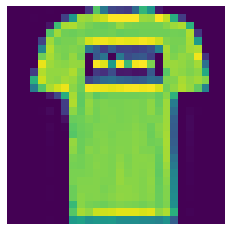

In [ ]:
plt.imshow(x_train[1])
plt.axis('off')

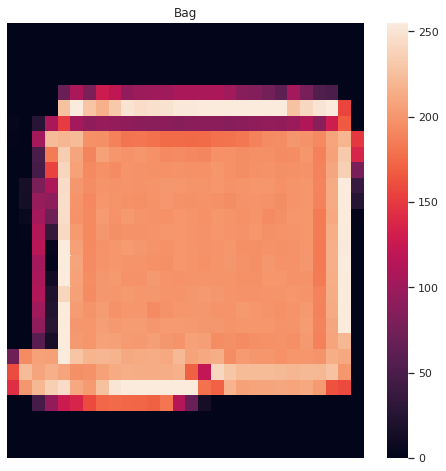

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(x_train[52000])
plt.title(y_label_classes[y_train[52000]])
plt.axis('off')
plt.show()

In [ ]:
y_label_classes[y_train[52000]]

'Bag'

In [37]:
def imgefunc(index):
  plt.imshow(x_train[index])
  # plt.axis('off')
  plt.title(y_label_classes[y_train[index]])
  plt.xlabel(y_train[index])
  plt.grid(False)
  plt.show()

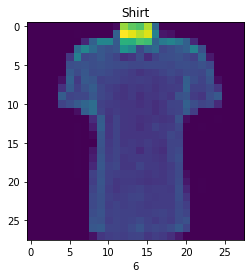

In [43]:
imgefunc(5245)

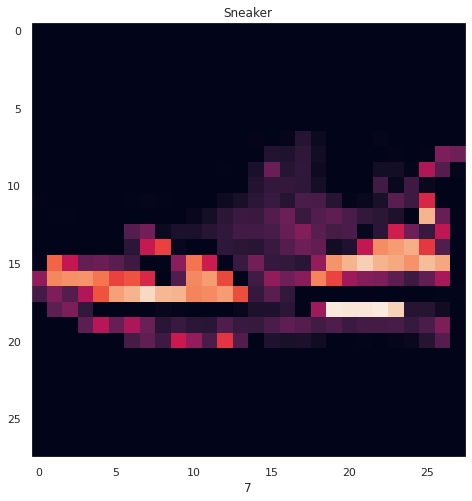

In [ ]:
imgefunc(48005)

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

# normalize the training set

In [ ]:

x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)
 # make the 4D array

In [ ]:
x_train.shape

(60000, 28, 28, 1)

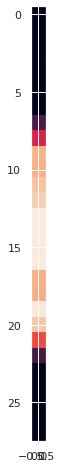

In [ ]:
from tensorflow import keras

In [ ]:
# by the krish naik
def build_modell(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
tuner_search=RandomSearch(build_modell,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [ ]:
tuner_search.search(x_train,y_train , epochs=5 , validation_split=0.1)

Trial 5 Complete [00h 00m 36s]
val_accuracy: 0.9056666493415833

Best val_accuracy So Far: 0.9138333201408386
Total elapsed time: 00h 05m 01s


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 112)       2912      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 48)        134448    
                                                                 
 flatten (Flatten)           (None, 19200)             0         
                                                                 
 dense (Dense)               (None, 96)                1843296   
                                                                 
 dense_1 (Dense)             (None, 10)                970       
                                                                 
Total params: 1,981,626
Trainable params: 1,981,626
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1036 - accuracy: 0.9614 - val_loss: 0.3280 - val_accuracy: 0.9098
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0808 - accuracy: 0.9693 - val_loss: 0.3272 - val_accuracy: 0.9113
Epoch 6/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0648 - accuracy: 0.9761 - val_loss: 0.3723 - val_accuracy: 0.9112
Epoch 7/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0508 - accuracy: 0.9811 - val_loss: 0.4097 - val_accuracy: 0.9125
Epoch 8/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0430 - accuracy: 0.9840 - val_loss: 0.4204 - val_accuracy: 0.9167
Epoch 9/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0380 - accuracy: 0.9863 - val_loss: 0.4250 - val_accuracy: 0.9172
Epoch 10/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0301 - accuracy: 0.9896 - val_loss: 0.5439 - val_accur

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.103601,0.961426,0.327990,0.909833
1,0.080779,0.969296,0.327174,0.911333
2,0.064756,0.976111,0.372343,0.911167
3,0.050775,0.981056,0.409746,0.912500
4,0.043034,0.983963,0.420431,0.916667
5,0.038046,0.986278,0.425016,0.917167
6,0.030100,0.989574,0.543895,0.912167


In [ ]:
model.save('/content/drive/MyDrive/fashion mnist/fashion_mnist.h5')

In [3]:
model = load_model('/content/drive/MyDrive/fashion mnist/fashion_mnist.h5')

In [15]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)
 # make the 4D array

In [18]:
y_pred = model.predict(x_test)

In [19]:
y_pred

array([[1.1504735e-25, 2.8436183e-17, 3.1265111e-18, ..., 1.4127508e-12,
        6.7671851e-25, 1.0000000e+00],
       [7.1290006e-13, 7.9335025e-29, 9.9999964e-01, ..., 4.7460467e-22,
        2.6848163e-17, 3.0170844e-20],
       [1.2407361e-32, 1.0000000e+00, 8.3710447e-30, ..., 0.0000000e+00,
        1.0320563e-34, 0.0000000e+00],
       ...,
       [3.5643859e-31, 1.7556270e-34, 5.9187923e-17, ..., 1.4240667e-28,
        1.0000000e+00, 1.1357018e-30],
       [3.9306935e-31, 1.0000000e+00, 3.8387855e-33, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.6995753e-10, 9.0759903e-13, 1.1723897e-12, ..., 9.8384177e-08,
        4.4514962e-08, 3.4183875e-06]], dtype=float32)

In [20]:
y_pred.shape

(10000, 10)

In [26]:
prdiction = [np.argmax(pred_index) for pred_index in y_pred]

In [30]:
import pandas as pd

In [31]:
df = pd.DataFrame({'prediction':prdiction,'actual':list(y_test)})
df.head()

,prediction,actual
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [32]:
df['prediction'].value_counts()

6    1069
7    1049
2    1035
5    1000
4     998
3     996
1     989
8     989
9     954
0     921
Name: prediction, dtype: int64

In [33]:
df['prediction'].value_counts()

6    1069
7    1049
2    1035
5    1000
4     998
3     996
1     989
8     989
9     954
0     921
Name: prediction, dtype: int64

Text(0.5, 1.0, ' Pullover')

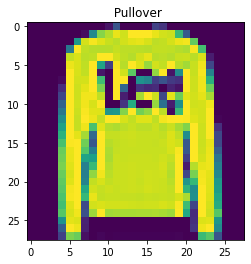

In [46]:
plt.imshow(x_test[1])
plt.title(y_label_classes[y_test[1]])

In [48]:
y_label_classes[df['prediction'][1]]
# as you can see my prediction

' Pullover'

Text(0.5, 1.0, ' Ankle boot')

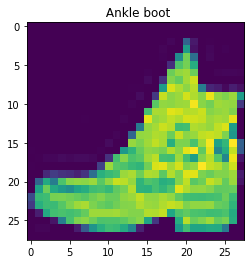

In [50]:
plt.imshow(x_test[4584])
plt.title(y_label_classes[y_test[4584]])

In [51]:
y_label_classes[df['prediction'][4584]]
# as you can see my prediction

' Ankle boot'

Thank you 🥰🥰